# Data Science Bootcamp

In diesem Notebook wollen wir maschinelles lernen anhand praktischer Beispiele erklären.


Inhaltsverzeichnis


>[Data Science Bootcamp](#scrollTo=wVqKRWWir2lv)

>>[Einfache Daten](#scrollTo=ndKUV3q-fEJe)

>>>[Linare Regression](#scrollTo=V_dIBBV3tGBh)

>>>[XGBoost](#scrollTo=cGpnv7ch60rE)

>>[Komplexere Daten](#scrollTo=nQCA_sHdwvLl)

>>[Real World Data](#scrollTo=6afGN23eZwC3)

>>>[California Housing](#scrollTo=6afGN23eZwC3)

>[Clustering](#scrollTo=fJGhY9NgektT)

>[Klassifikation](#scrollTo=z-rLIaZndcMO)

>[Jetzt seid Ihr an der Reihe !](#scrollTo=QbLmcjtQcMJy)

>>>[Übung](#scrollTo=pTyMeChNodZ6)

>>>[Lösungen](#scrollTo=nMc6ngj1Nx-T)

>>>[Übung](#scrollTo=qPpa1Saqoi9U)

>>[Beschreibung des Datensatzes:](#scrollTo=taPQQOFqSfTT)

>>>[Attribute Information:](#scrollTo=taPQQOFqSfTT)

>>>[Zusätzliche Berechnungen:](#scrollTo=taPQQOFqSfTT)

>>>[Klassen:](#scrollTo=taPQQOFqSfTT)

>>[Laden des Datensatzes in Python:](#scrollTo=taPQQOFqSfTT)

>>>[Lösungen](#scrollTo=1HmD0O86S-zT)



In [1]:
!pip install numpy matplotlib tensorflow pandas seaborn xgboost scikit-learn

Zuerst importieren wir alle notwendigen Bibliotheken.


In [2]:
# Importieren der erforderlichen Bibliotheken
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn import svm
from sklearn.metrics import accuracy_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import pandas as pd

import seaborn as sns

import xgboost as xgb

## Einfache Daten

Wir erstellen nun einen Datensatz für ein lineares Regressionsproblem.
Die Dimesion der "features" ist 1.
Wir erstellen 600 Datenpunkte.

In [3]:
# Generieren linearer Daten
#X_linear sind die Features
#y_linear sind die Targets
X_linear, y_linear = make_regression(n_samples=600, n_features=1, noise=10, random_state=42)


Zum besseren Verständniss Visualisieren wir die erzeugten Daten.

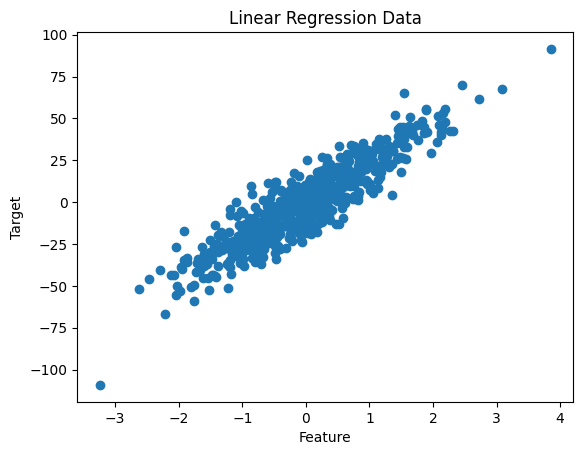

In [4]:
# Visualisierung der Daten
plt.scatter(X_linear, y_linear)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Linear Regression Data')
plt.show()

### Linare Regression


**Aufteilen in Trainings- und Testdaten:**

Der Code beginnt damit, die vorhandenen Daten in zwei Teile aufzuteilen: ein Trainingssatz und ein Testsatz.
Der Trainingssatz wird verwendet, um das Modell zu trainieren, während der Testsatz dazu dient, die Leistung des Modells zu bewerten.
In diesem Fall werden 20% der Daten als Testsatz verwendet und der Rest als Trainingssatz.
Die random_state-Einstellung gewährleistet, dass die Aufteilung der Daten bei jedem Durchlauf des Codes gleich bleibt, was wichtig für reproduzierbare Ergebnisse ist.

**Lineare Regression:**

Als Nächstes wird ein lineares Regressionsmodell erstellt.
Dieses Modell wird dann mit den Trainingsdaten trainiert, was bedeutet, dass es versucht, eine Beziehung zwischen den unabhängigen Variablen (Features) und der abhängigen Variablen (Ziel) zu lernen.

**Vorhersagen und Leistungsbewertung:**

Nachdem das Modell trainiert wurde, wird es verwendet, um Vorhersagen auf dem Testsatz zu machen.
Diese Vorhersagen werden dann verwendet, um die Leistung des Modells zu bewerten.
Die Leistung wird hier anhand des mittleren quadratischen Fehlers gemessen. Dies ist eine gängige Metrik, die misst, wie nah die Vorhersagen des Modells an den tatsächlichen Werten liegen.
Ein niedrigerer Wert für den mittleren quadratischen Fehler deutet auf ein besseres Modell hin.

In [5]:

# Aufteilen in Trainings- und Testdaten
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)

# Lineare Regression
lin_reg = LinearRegression()
#training des Modells
lin_reg.fit(X_train_lin, y_train_lin)
#Vorhersage
y_pred_lin = lin_reg.predict(X_test_lin)

# Leistungsbewertung (Auf Test set)
mse_lin = mean_squared_error(y_test_lin, y_pred_lin)
print(f'Mittlerer quadratischer Fehler (Linear Regression): {mse_lin}')


Mittlerer quadratischer Fehler (Linear Regression): 96.58247638287894


### XGBoost

**XGBoost-Einführung:**

XGBoost steht für "eXtreme Gradient Boosting". Es ist eine fortschrittliche und effiziente Implementierung des Gradient Boosting Algorithmus.
Im Vergleich zur linearen Regression, die ein einfacheres Modell ist und davon ausgeht, dass es eine lineare Beziehung zwischen unabhängigen und abhängigen Variablen gibt, ist XGBoost wesentlich komplexer.
XGBoost verwendet Entscheidungsbäume als Bausteine und kombiniert sie in einer iterativen Weise, um die Vorhersageleistung zu verbessern. Es optimiert sowohl die Vorhersagegenauigkeit als auch die Recheneffizienz und verfügt über Funktionen zur Vermeidung von Overfitting.
Code-Erklärung:

**Initialisierung des XGBoost-Regressors:**

Zuerst wird ein XGBoost-Regressor-Objekt erstellt.
Das objective-Argument ist auf 'reg:squarederror' gesetzt, was bedeutet, dass das Modell den quadratischen Fehler zwischen den Vorhersagen und den tatsächlichen Werten minimiert.
Der seed-Parameter stellt sicher, dass die Ergebnisse reproduzierbar sind.

**Training des Modells:**

Das XGBoost-Modell wird mit den Trainingsdaten trainiert. Dies umfasst das Lernen der Beziehungen zwischen den Features und der Zielvariablen mit der komplexen Struktur von XGBoost.

**Vorhersagen auf Testdaten:**

Nach dem Training wird das Modell verwendet, um Vorhersagen auf dem Testsatz zu machen.

**Leistungsbewertung:**

Die Vorhersagen werden dann mit den tatsächlichen Werten verglichen, um die Leistung des Modells zu bewerten.
Hier wird der mittlere quadratische Fehler (MSE) berechnet, der ein Maß dafür ist, wie nah die Vorhersagen des Modells an den tatsächlichen Werten liegen. Ein niedrigerer MSE-Wert deutet auf ein genaueres Modell hin.

In [6]:
# XGBoost
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xgb_reg.fit(X_train_lin, y_train_lin)
y_pred_xgb = xgb_reg.predict(X_test_lin)

# Leistungsbewertung
mse_xgb = mean_squared_error(y_test_lin, y_pred_xgb)
print(f'Mittlerer quadratischer Fehler (XGBoost): {mse_xgb}')


Mittlerer quadratischer Fehler (XGBoost): 159.9338492538381


Wir sehen das XGboost icht zwingend die bessere Performance hat obwohl das Modell viel komplexer ist.


<table>
  <tr>
  <th></th>
   <th>Mittlerer quadratischer Fehler</th>
  </tr>
  <tr>
    <th>Lineare Regression</th>
    <td>96.582</td>
    </tr>
    <tr>
    <th>XGBoost</th>
    <td>159.933</td>
  </tr>
</table>

Wir können auch die Vorhersagen vs tatsächliche Werte visualiseren. Im Idealfall befinden sich alle Punkte sehr nah bzw. auf der x=y Linie (rot)

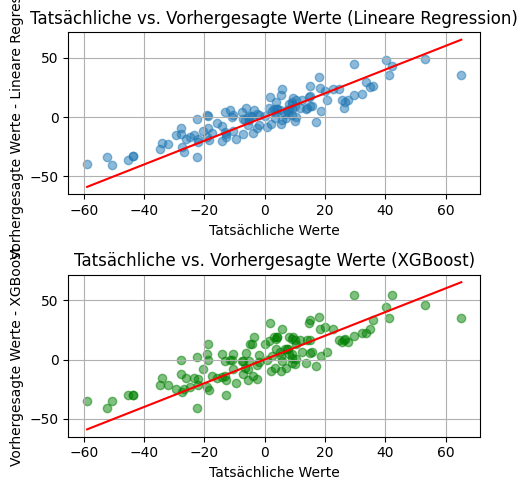

In [7]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# First subplot for Linear Regression
ax1.scatter(y_test_lin, y_pred_lin, alpha=0.5)
ax1.set_xlabel('Tatsächliche Werte')
ax1.set_ylabel('Vorhergesagte Werte - Lineare Regression')
ax1.set_title('Tatsächliche vs. Vorhergesagte Werte (Lineare Regression)')
ax1.plot([min(y_test_lin), max(y_test_lin)], [min(y_test_lin), max(y_test_lin)], color='red')  # Diagonale Linie
ax1.grid()

# Second subplot for XGBoost
ax2.scatter(y_test_lin, y_pred_xgb, alpha=0.5, color='green')
ax2.set_xlabel('Tatsächliche Werte')
ax2.set_ylabel('Vorhergesagte Werte - XGBoost')
ax2.set_title('Tatsächliche vs. Vorhergesagte Werte (XGBoost)')
ax2.plot([min(y_test_lin), max(y_test_lin)], [min(y_test_lin), max(y_test_lin)], color='red')  # Diagonale Linie
ax2.grid()

# Display the plot
plt.tight_layout()
plt.show()



Weiters können wir die Vorhersage visualiseren indem wir die Modelle in einem sehr kleinen Intervall kontinuierlich auswerten.

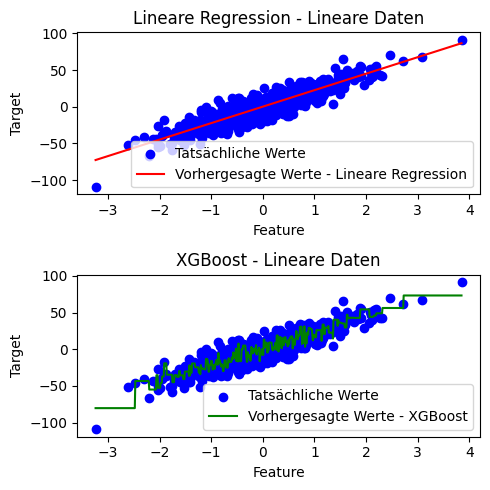

In [8]:
# Calculate the range for predictions
X_range = np.arange(X_linear.min(), X_linear.max(), 0.01).reshape(-1, 1)

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# First subplot for Linear Regression
ax1.scatter(X_linear, y_linear, color='blue', label='Tatsächliche Werte')
ax1.plot(X_range, lin_reg.predict(X_range), color='red', label='Vorhergesagte Werte - Lineare Regression')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')
ax1.set_title('Lineare Regression - Lineare Daten')
ax1.legend()

# Second subplot for XGBoost
ax2.scatter(X_linear, y_linear, color='blue', label='Tatsächliche Werte')
ax2.plot(X_range, xgb_reg.predict(X_range), color='green', label='Vorhergesagte Werte - XGBoost')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')
ax2.set_title('XGBoost - Lineare Daten')
ax2.legend()

# Display the plot
plt.tight_layout()
plt.show()

Wir sehen, da die lineare Regression eben nur eine lineare Funktion darstellt eine gerade Linie mit gewisser (gelernter) Steigung. XGBoost hingegen kann deutlich komplexere zusammenhänge lernen, was aber hier nicht Vorteilhaft ist.

## Komplexere Daten

Wir werden uns jetzt Komplexere Daten generieren um zu demonstrieren wo die lineare Regression an ihre Grenzen kommt.

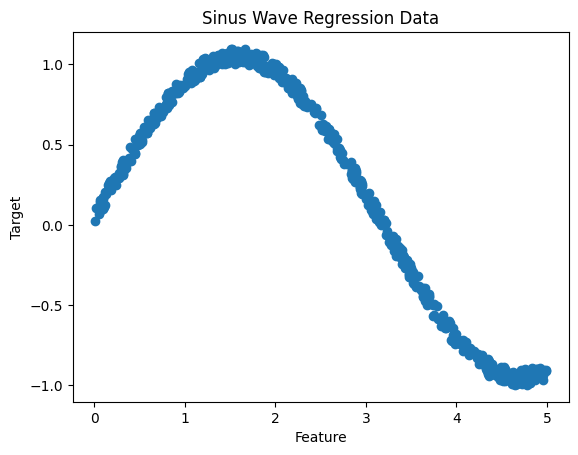

In [9]:

np.random.seed(0)
# Generieren der Sinus-Daten
X_sinus = 5 * np.random.rand(600, 1)
y_sinus = np.sin(X_sinus).ravel()

# Hinzufügen von Rauschen
y_sinus += 0.1* np.random.rand(600)

# Visualisierung der Daten
plt.scatter(X_sinus, y_sinus)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('Sinus Wave Regression Data')
plt.show()

Wir traineren wieder ein eine Lineare Regression. Davor splitten wir wieder unsere Daten in train und test set.

In [10]:
# Aufteilen in Trainings- und Testdaten
X_train_sinus, X_test_sinus, y_train_sinus, y_test_sinus = train_test_split(X_sinus, y_sinus, test_size=0.2, random_state=42)

# Lineare Regression
lin_reg_sinus = LinearRegression()
#training des Modells
lin_reg_sinus.fit(X_train_sinus.reshape(-1, 1), y_train_sinus)
y_pred_lin_sinus = lin_reg_sinus.predict(X_test_sinus)

# Leistungsbewertung
mse_lin_sinus = mean_squared_error(y_test_sinus, y_pred_lin_sinus)
print(f'Mittlerer quadratischer Fehler (Linear Regression): {mse_lin_sinus}')




Mittlerer quadratischer Fehler (Linear Regression): 0.1410957745334462


Das selbe mit XGBoost

In [11]:
# XGBoost
xgb_reg_sinus = xgb.XGBRegressor(objective ='reg:squarederror', seed=42)
xgb_reg_sinus.fit(X_train_sinus, y_train_sinus)
y_pred_xgb_sinus = xgb_reg_sinus.predict(X_test_sinus)

# Leistungsbewertung
mse_xgb_sinus = mean_squared_error(y_test_sinus, y_pred_xgb_sinus)
print(f'Mittlerer quadratischer Fehler (XGBoost): {mse_xgb_sinus}')


Mittlerer quadratischer Fehler (XGBoost): 0.0012507894840241842


Wir sehen XGBoost performt viel besser als die lineare Regression.



<table>
  <tr>
    <th>Lineare Regression</th>
    <td> 0.14109</td>
  </tr>
  <tr>
    <th>XGBoost</th>
    <td>0.00125</td>

  </tr>

</table>


Plotten der Tatsächlichen Werte vs Vorhergesagte Werte

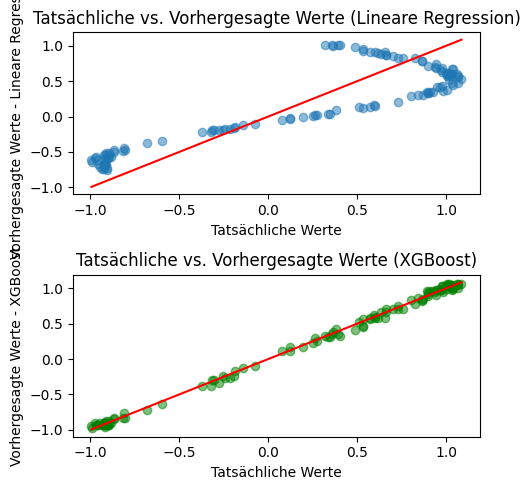

In [12]:
# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))

# First subplot for Linear Regression
ax1.scatter(y_test_sinus, y_pred_lin_sinus, alpha=0.5)
ax1.set_xlabel('Tatsächliche Werte')
ax1.set_ylabel('Vorhergesagte Werte - Lineare Regression')
ax1.set_title('Tatsächliche vs. Vorhergesagte Werte (Lineare Regression)')
ax1.plot([min(y_test_sinus), max(y_test_sinus)], [min(y_test_sinus), max(y_test_sinus)], color='red')  # Diagonal line

# Second subplot for XGBoost
ax2.scatter(y_test_sinus, y_pred_xgb_sinus, alpha=0.5, color='green')
ax2.set_xlabel('Tatsächliche Werte')
ax2.set_ylabel('Vorhergesagte Werte - XGBoost')
ax2.set_title('Tatsächliche vs. Vorhergesagte Werte (XGBoost)')
ax2.plot([min(y_test_sinus), max(y_test_sinus)], [min(y_test_sinus), max(y_test_sinus)], color='red')  # Diagonal line

# Adjust layout and show the plot
plt.tight_layout()
plt.show()



Wir schauen uns wieder die Vorhergesagten Werte mit den echten Daten an.

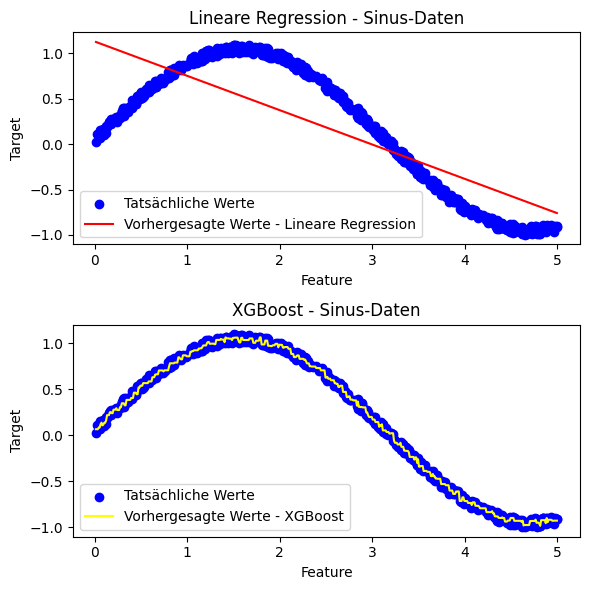

In [13]:

# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))
X_range_xgb=np.arange(X_sinus.min(), X_sinus.max(), 0.01).reshape(-1, 1)
# First subplot for Linear Regression
ax1.scatter(X_sinus, y_sinus, color='blue', label='Tatsächliche Werte')
ax1.plot(X_range_xgb, lin_reg_sinus.predict(X_range_xgb), color='red', label='Vorhergesagte Werte - Lineare Regression')
ax1.set_xlabel('Feature')
ax1.set_ylabel('Target')
ax1.set_title('Lineare Regression - Sinus-Daten')
ax1.legend()

# Second subplot for XGBoost
ax2.scatter(X_sinus, y_sinus, color='blue', label='Tatsächliche Werte')
ax2.plot(X_range_xgb, xgb_reg_sinus.predict(X_range_xgb), color='yellow', label='Vorhergesagte Werte - XGBoost')
ax2.set_xlabel('Feature')
ax2.set_ylabel('Target')
ax2.set_title('XGBoost - Sinus-Daten')
ax2.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Nun wollen wir uns mit echten Daten (Real World Daten) beschäftigen.

##Real World Data
### California Housing

**Attribute Information:**
* MedInc median income in block group

* HouseAge median house age in block group

* AveRooms average number of rooms per household

* AveBedrms average number of bedrooms per household

* Population block group population

* AveOccup average number of household members

* Latitude block group latitude

* Longitude block group longitude

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

In [14]:

# Laden des Datensatzes
# housing.data entspricht unserem X
# housing.target entspricht unserem Y
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df['target'] = housing.target

housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Um ein bessere Gefühl für die Daten zu bekommen lassen wir uns eine statistische Zusammenfassung ausgeben.

In [15]:
# Grundlegende Statistik
print(housing_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

Wir plotten auch die Histogramme aller Variablen.

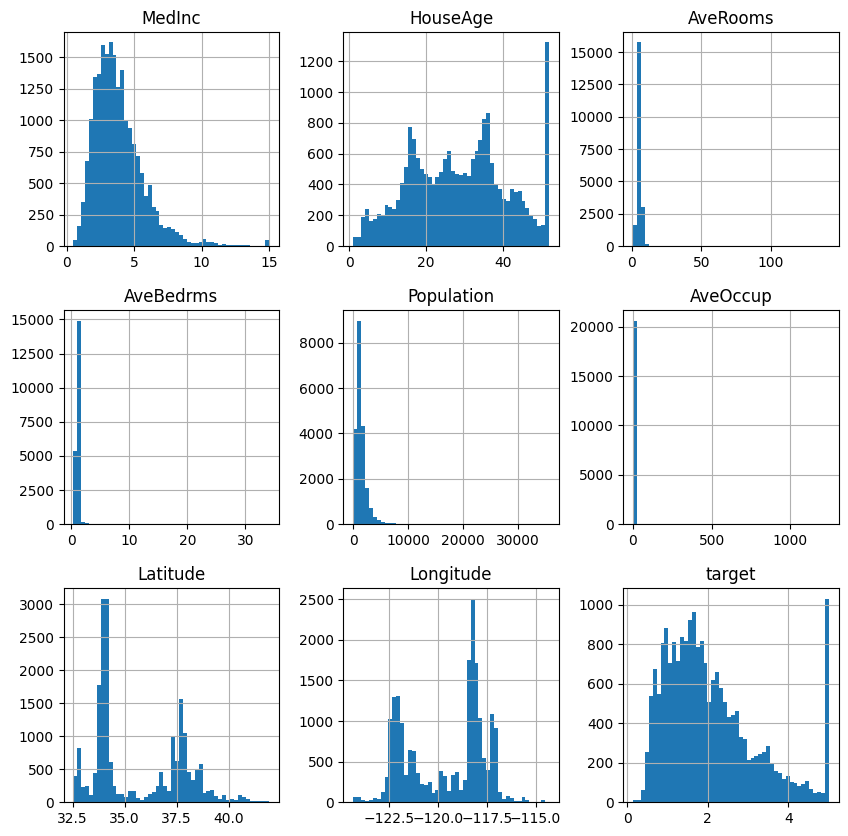

In [16]:
# Histogramme für alle Merkmale und die Zielvariable
housing_df.hist(bins=50, figsize=(10, 10))
plt.show()

Wir schauen uns auch die Korrelations matrix an.

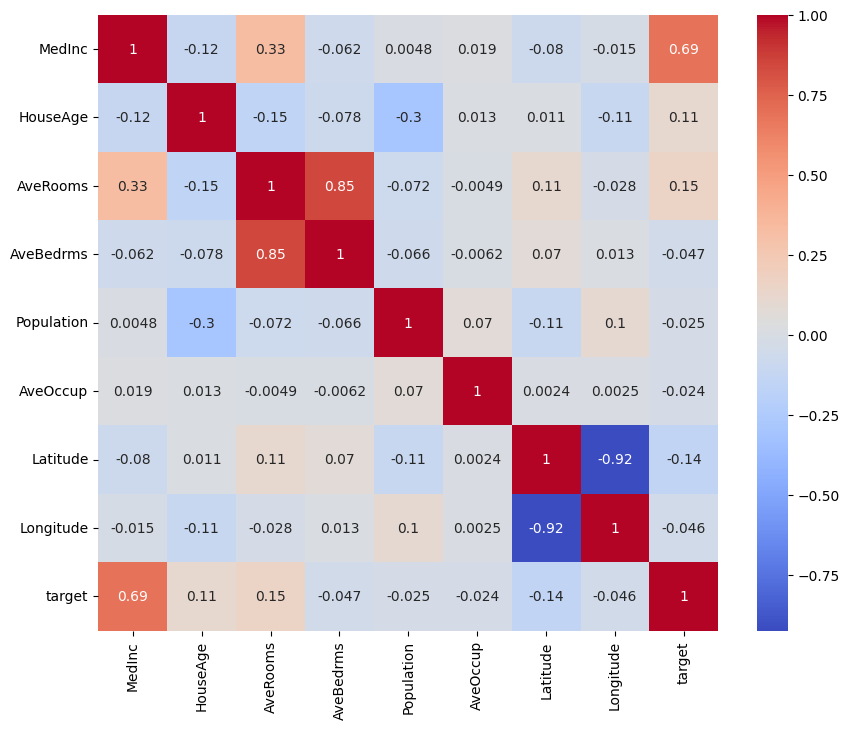

In [17]:
# Korrelationsmatrix
corr_matrix = housing_df.corr()

# Heatmap der Korrelation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


Weil wir die Koordianten in Longitude und Latitude haben können wir uns die geographische Lage der Daten ansehen.

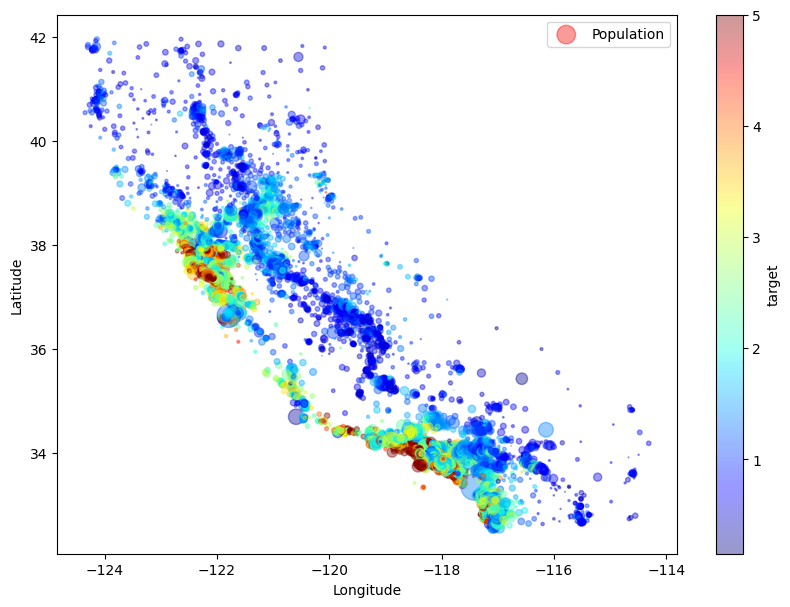

In [18]:
housing_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
                s=housing_df["Population"]/100, label="Population", figsize=(10,7),
                c="target", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()


Wir erstellen auch wieder eine Scatterplot Matrix für einige Attribute.

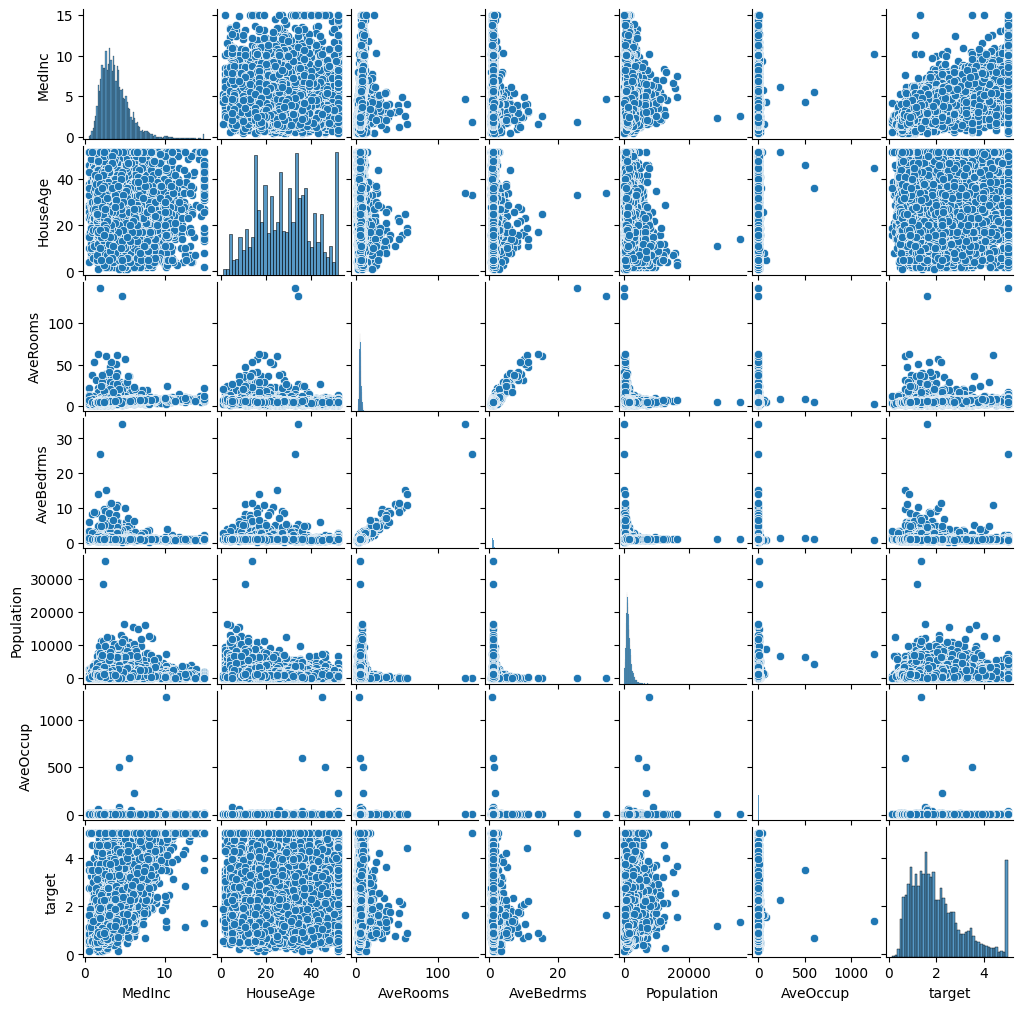

In [19]:
# Auswahl einiger interessanter Merkmale
attributes = ["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "target"]

# Scatterplot-Matrix
g=sns.pairplot(housing_df[attributes])
g.fig.set_size_inches(10,10)
plt.show()


Wir sehen, dass anscheinend sehr viele durchschnittliche Häuser Werte einen Werte einen Wert von 5 haben. Es könnte sein das alle Werte über 5 einfach auf 5 gesetzt wurden. Wir entscheiden uns das wir nur duschnittlichen Häuserwert bis 4.99 vorhersagen wollen und löschen alle Häuser mit einem Target wert von 5 aus unserem Datensatz.

In [20]:
filtered_df = housing_df[housing_df['target'] < 5.00]
print(filtered_df.describe())

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  19648.000000  19648.000000  19648.000000  19648.000000  19648.000000   
mean       3.676411     28.373066      5.361708      1.096621   1441.368485   
std        1.570602     12.504050      2.293321      0.452136   1144.075196   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.526300     18.000000      4.416667      1.005882    796.000000   
50%        3.449050     28.000000      5.185730      1.048576   1179.000000   
75%        4.582500     37.000000      5.971083      1.099222   1746.250000   
max       15.000100     52.000000    132.533333     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        target  
count  19648.000000  19648.000000  19648.000000  19648.000000  
mean       3.096560     35.651872   -119.562378      1.920553  
std       10.639195      2.150066      2.005760      0.971109  
min        0.692308     32.54000

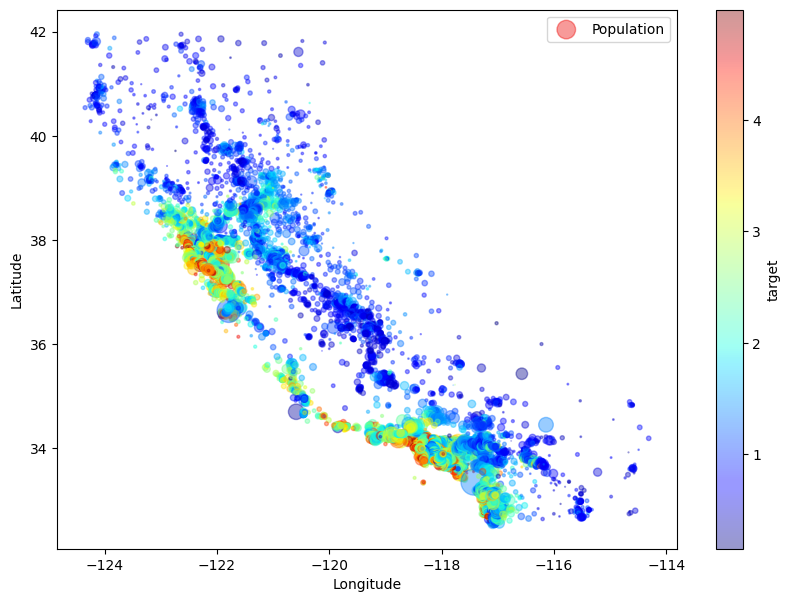

In [21]:
filtered_df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
                s=filtered_df["Population"]/100, label="Population", figsize=(10,7),
                c="target", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()
plt.show()

Bis jetzt waren die Daten in einem (pandas) Dataframe gemeinsam. Wir splitten nun in X und y auf.

In [22]:
# Features und Zielvariable
# Alles was nicht target ist
X = filtered_df.drop('target', axis=1)
# Nur target
y = filtered_df['target']

# Aufteilen der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Wir erstellen wieder ein Lineares Regressionsmodell sowie ein XGBosst modell.

In [23]:
# Erstellen des linearen Regressionsmodells
lin_reg = linear_model.LinearRegression()

# Trainieren des Modells
lin_reg.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred_lin = lin_reg.predict(X_test)

# Leistungsbewertung
mse_lin = mean_squared_error(y_test, y_pred_lin)
print(f'Mittlerer quadratischer Fehler (Linear Regression): {mse_lin}')

# Erstellen des XGBoost-Modells
xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror')

# Trainieren des Modells
xgb_reg.fit(X_train, y_train)

# Vorhersagen auf dem Testset machen
y_pred_xgb = xgb_reg.predict(X_test)

# Leistungsbewertung
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mittlerer quadratischer Fehler (XGBoost): {mse_xgb}')

Mittlerer quadratischer Fehler (Linear Regression): 0.4132737244622422
Mittlerer quadratischer Fehler (XGBoost): 0.18607643452219444


Wir sehen, dass das XGBoost modell wesentlich besser performt als die Lineare Regression. Das wollen wir auch Visualisieren.

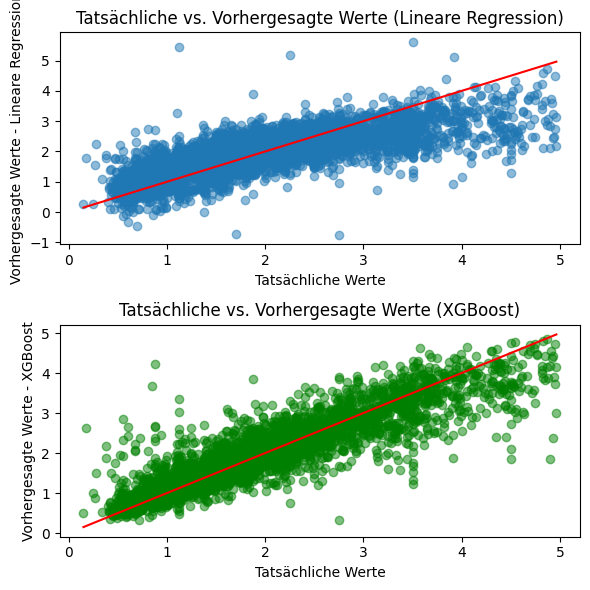

In [24]:


# Create a figure and a set of subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# First subplot for Linear Regression
ax1.scatter(y_test, y_pred_lin, alpha=0.5)
ax1.set_xlabel('Tatsächliche Werte')
ax1.set_ylabel('Vorhergesagte Werte - Lineare Regression')
ax1.set_title('Tatsächliche vs. Vorhergesagte Werte (Lineare Regression)')
ax1.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line

# Second subplot for XGBoost
ax2.scatter(y_test, y_pred_xgb, alpha=0.5, color='green')
ax2.set_xlabel('Tatsächliche Werte')
ax2.set_ylabel('Vorhergesagte Werte - XGBoost')
ax2.set_title('Tatsächliche vs. Vorhergesagte Werte (XGBoost)')
ax2.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Wir sehen, dass die lineare Regression den Median Housevalue für teurere Häuser unterschätzt.

# Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


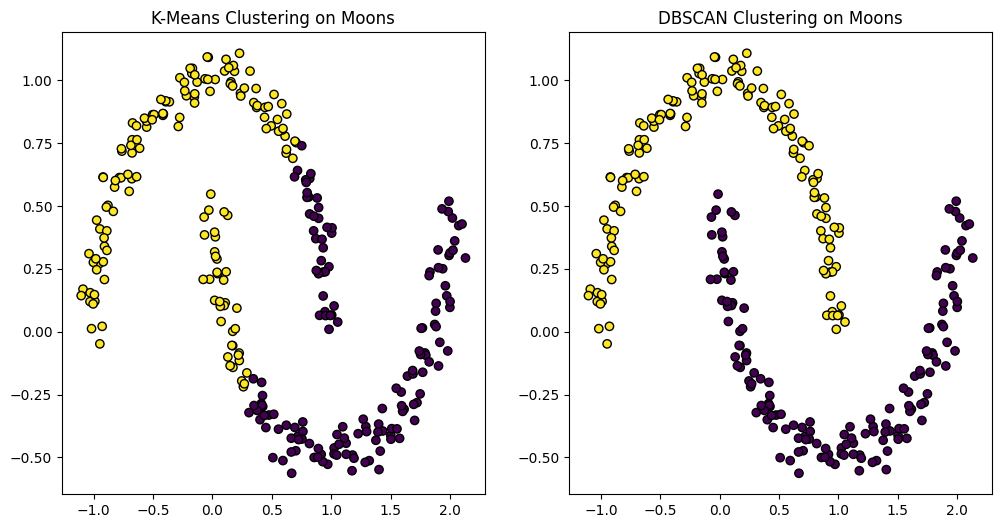

In [25]:

# Generating the moons dataset
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)

# K-Means Clustering
kmeans_moons = KMeans(n_clusters=2, random_state=42)
y_kmeans_moons = kmeans_moons.fit_predict(X_moons)

# DBSCAN Clustering
dbscan_moons = DBSCAN(eps=0.2, min_samples=5)
y_dbscan_moons = dbscan_moons.fit_predict(X_moons)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_kmeans_moons, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on Moons")

plt.subplot(122)
plt.scatter(X_moons[:, 0], X_moons[:, 1], c=y_dbscan_moons, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering on Moons")

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


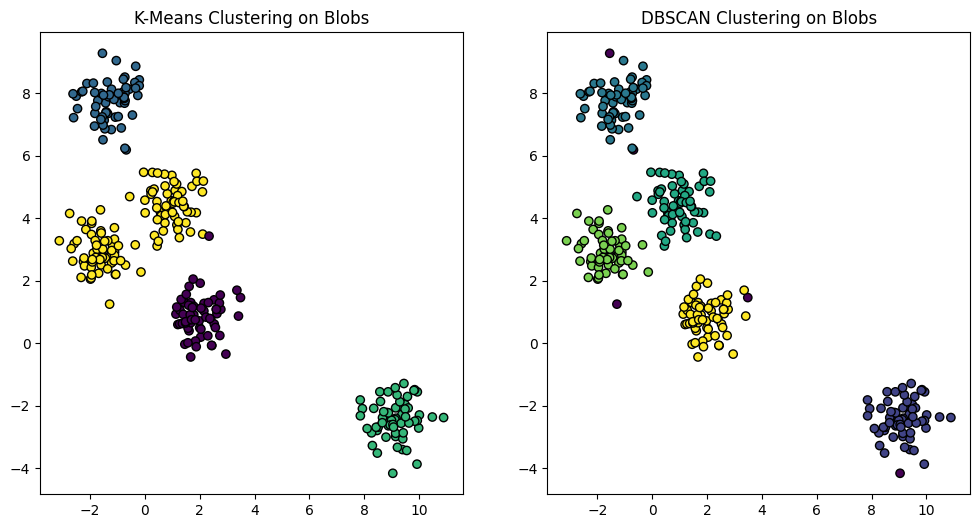

In [26]:
from sklearn.datasets import make_blobs

# Generating the blobs dataset
X_blobs, y_blobs = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# K-Means Clustering
kmeans_blobs = KMeans(n_clusters=4, random_state=42)
y_kmeans_blobs = kmeans_blobs.fit_predict(X_blobs)

# DBSCAN Clustering
dbscan_blobs = DBSCAN(eps=0.70, min_samples=5)
y_dbscan_blobs = dbscan_blobs.fit_predict(X_blobs)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans_blobs, cmap='viridis', edgecolor='k')
plt.title("K-Means Clustering on Blobs")

plt.subplot(122)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_dbscan_blobs, cmap='viridis', edgecolor='k')
plt.title("DBSCAN Clustering on Blobs")

plt.show()


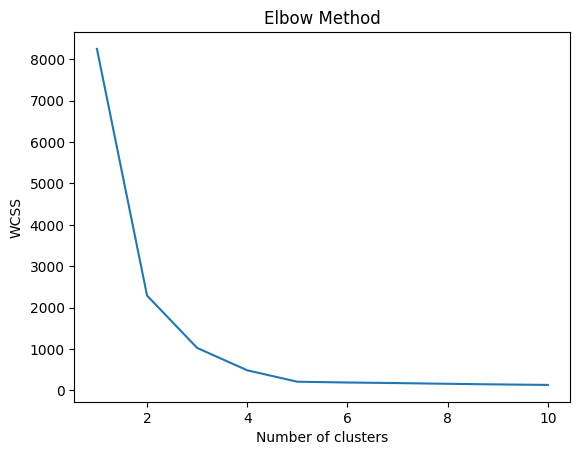

In [27]:


# Generating synthetic data
X_class, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):  # Testing 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_class)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



# Klassifikation
In dieser Sektion wollen wir einfache Modelle traineren die Daten Klassifizieren können. Der Einfachheit halber nehmen wir nur 2 verschiedene Klassen an bzw auch nur 2 Dimensionale Datensätze um diese  visualisieren zu können.

Im folgenden Beispiel erstellen wir uns ein Klassisches Dateset, dass Moons-dataset.

1. **Datengenerierung:**
   - `X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)`:
     - Hier wird die Funktion `make_moons` aus der Bibliothek `sklearn.datasets` verwendet, um 1000
       Datenpunkte zu generieren (`n_samples=1000`).
     - Der Parameter `noise=0.2` fügt den Daten eine gewisse Zufälligkeit hinzu, was zu einer
       realistischeren und herausfordernderen Klassifizierungsaufgabe führt.
     - `random_state=0` sorgt dafür, dass die Generierung der Daten reproduzierbar ist, was bedeutet,
       dass bei jedem Ausführen des Codes der gleiche Datensatz erstellt wird.
   - `X` enthält die Koordinaten der Datenpunkte in einem zweidimensionalen Raum, während `y` die
     zugehörigen Klassenlabels (0 oder 1) enthält.

2. **Visualisierung des Datensatzes:**
   - `plt.figure(figsize=(8, 6))`: Erstellt eine neue Abbildung für die Visualisierung mit einer Größe
     von 8x6 Zoll.
   - `plt.scatter(...)`: Diese Funktion wird verwendet, um die Datenpunkte auf der Abbildung zu zeichnen.
     Es werden zwei `scatter`-Aufrufe verwendet, um Datenpunkte unterschiedlicher Klassen in verschiedenen
     Farben darzustellen:
     - `plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')`: Zeichnet die
       Datenpunkte der Klasse 0 in Rot. `X[y == 0]` wählt alle Datenpunkte aus, deren Klasse 0 ist.
     - `plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')`: Zeichnet die
       Datenpunkte der Klasse 1 in Blau. `X[y == 1]` wählt alle Datenpunkte aus, deren Klasse 1 ist.
   - `plt.title(...)`, `plt.xlabel(...)`, `plt.ylabel(...)`: Fügen der Abbildung einen Titel und
     Beschriftungen für die x- und y-Achsen hinzu.
   - `plt.legend()`: Fügt eine Legende hinzu, um die Farbcodierung der Klassen zu erklären.
   - `plt.show()`: Zeigt die fertige Abbildung an.

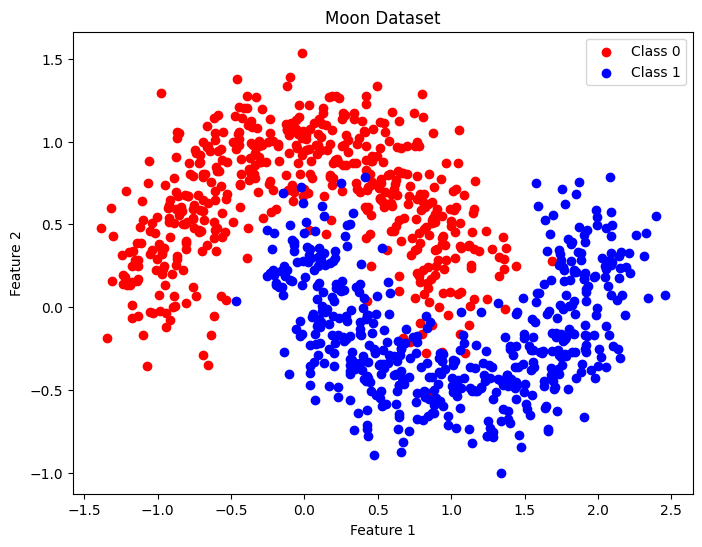

In [28]:

# Generate the dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=0)
# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Wir werden ein Neuronales Netz trainieren um die Punkte Korrekt zu klassifizieren.


 Erklärungen:

**Train-Validation-Test-Split:**
   - Zuerst teilen wir die Daten in Trainings- und temporäre Sets (hier als X_temp und y_temp bezeichnet) auf.
     20% der Daten werden für das temporäre Set reserviert (`test_size=0.2`).
   - Das temporäre Set wird dann in Validierungs- und Testsets aufgeteilt, wobei jeder Teil 50% des temporären
     Sets enthält (`test_size=0.5`).

**Modelldefinition:**
   - Das Modell wird als Sequenz von Layern definiert. Wir verwenden zwei versteckte Layer mit jeweils 10
     Neuronen und der ReLU-Aktivierungsfunktion. Das Ausgangs-Neuron verwendet die Sigmoid-Aktivierung,
     passend für binäre Klassifizierungsprobleme.

**Modellkompilierung:**
   - Das Modell wird mit dem Adam-Optimizer, der Verlustfunktion `binary_crossentropy` (geeignet für
     binäre Klassifizierungsprobleme) und der Metrik 'accuracy' kompiliert.

**Modelltraining:**
   - Das Modell wird mit den Trainingsdaten trainiert, wobei die Validierungsdaten zur Evaluation nach
     jeder Epoche verwendet werden (`validation_data=(X_val, y_val)`). Dies hilft dabei, Overfitting zu
     erkennen und die Generalisierbarkeit des Modells zu überprüfen.

**Modellbewertung:**
   - Nach dem Training bewerten wir das Modell auf dem Testset, das bisher unberührt blieb. Dies gibt uns
     eine Vorstellung davon, wie gut das Modell auf neuen, unbekannten Daten performt.

Diese Struktur gewährleistet eine effektive und faire Bewertung des Modells und minimiert die
Wahrscheinlichkeit von Overfitting. Der Validierungssatz hilft bei der Feinabstimmung des Modells,
während der Testset eine unvoreingenommene Bewertung der Modellleistung ermöglicht.

**Verwendung der Sigmoid-Funktion für Klassifizierung**

Die Sigmoid-Funktion ist eine Art Aktivierungsfunktion, die häufig in neuronalen Netzen für binäre Klassifizierungsaufgaben verwendet wird. Sie wandelt einen Eingabewert in einen Wert zwischen 0 und 1 um, der als Wahrscheinlichkeit interpretiert werden kann.

**Funktionsweise der Sigmoid-Funktion:**

- **Formel:** Die Sigmoid-Funktion wird mathematisch als
σ(x) = 1/(1 + e^(-x))
definiert.

- **Ausgabe:** Sie nimmt einen beliebigen reellen Wert entgegen und „drückt“ ihn in den Bereich zwischen 0 und 1.
- **Interpretation:** Werte nahe 0 werden oft als die Klasse 0 (oder negativ) interpretiert, während Werte nahe 1 als die Klasse 1 (oder positiv) angesehen werden.

**Umwandlung in Klassen:**
- **Schwelle:** Typischerweise wird eine Schwelle (meistens 0.5) verwendet, um die Ausgabe der Sigmoid-Funktion in eine Klasse umzuwandeln.
- **Unter 0.5:** Werte unterhalb der Schwelle werden als Klasse 0 klassifiziert.
- **Über 0.5:** Werte oberhalb der Schwelle werden als Klasse 1 klassifiziert.

Diese Umwandlung erlaubt es dem neuronalen Netz, auf der Basis der berechneten Wahrscheinlichkeiten eine binäre Entscheidung zu treffen.




In [29]:

# Daten in Trainings- und Testsets aufteilen
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Das temporäre Set in Validierungs- und Testsets aufteilen
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definieren des Modells
model = Sequential([
    Dense(5, input_shape=(2,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trainieren des Modells mit Validierungsdaten
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=1)

# Evaluieren des Modells auf dem Testset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)



Epoch 1/100
25/25 [==============================] - 1s 11ms/step - loss: 0.7093 - accuracy: 0.5750 - val_loss: 0.6951 - val_accuracy: 0.5600
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6854 - accuracy: 0.7000 - val_loss: 0.6778 - val_accuracy: 0.7400
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6643 - accuracy: 0.7875 - val_loss: 0.6607 - val_accuracy: 0.7400
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6417 - accuracy: 0.7862 - val_loss: 0.6412 - val_accuracy: 0.7300
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6166 - accuracy: 0.7862 - val_loss: 0.6184 - val_accuracy: 0.7500
Epoch 6/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5874 - accuracy: 0.7987 - val_loss: 0.5933 - val_accuracy: 0.7600
Epoch 7/100
25/25 [==============================] - 0s 4ms/step - loss: 0.5563 - accuracy: 0.8050 - val_loss: 0.5647 - val_accuracy: 0.7600
Epoch 8/100


Zusammenfassung des Modells und Anzahl der Parameter

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 10)                60        
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 86 (344.00 Byte)
Trainable params: 86 (344.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


 Detaillierte Erklärung der Code-Segmente:


1. **Erstellung eines Gitters zur Darstellung der Entscheidungsgrenze:**
   - `x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1`: Bestimmt die horizontalen Grenzen des Gitters. `X[:, 0]` bezieht sich auf alle Werte der ersten Feature-Dimension. `min() - 1` und `max() + 1` erweitern den Bereich etwas über die tatsächlichen Daten hinaus, um eine bessere Visualisierung zu ermöglichen.
   - `y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1`: Bestimmt die vertikalen Grenzen des Gitters. `X[:, 1]` bezieht sich auf alle Werte der zweiten Feature-Dimension.
   - `xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))`: Erstellt ein Gitter von Punkten, das verwendet wird, um die Entscheidungsgrenze zu zeichnen. `np.meshgrid` kombiniert die Bereichswerte von `x_min` bis `x_max` und von `y_min` bis `y_max` in einem Gitter von Koordinaten.

2. **Vorhersagen für jeden Punkt im Gitter:**
   - `Z = model.predict(np.c_[xx.ravel(), yy.ravel()])`: Hier werden Vorhersagen für jeden Punkt im Gitter gemacht. `np.c_` kombiniert die x- und y-Koordinaten der Gitterpunkte in einer Liste von Koordinatenpaaren. `.ravel()` flacht das Gitter in eine eindimensionale Liste ab, die als Eingabe für `model.predict` verwendet wird.
   - `Z = Z.reshape(xx.shape)`: Die Vorhersagen `Z` werden wieder in die ursprüngliche Form des Gitters zurückgeformt, um die Entscheidungsgrenze zeichnen zu können.

3. **Plot der Entscheidungsgrenze:**
   - `plt.figure(figsize=(8, 6))`: Erstellt eine neue Figur für die Visualisierung mit einer Größe von 8x6 Zoll.
   - `plt.contourf(xx, yy, Z, alpha=0.8)`: Zeichnet die gefüllten Konturen (Entscheidungsgrenzen). `alpha` bestimmt die Transparenz der Füllfarben.
   - `plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')`: Zeichnet die Originaldatenpunkte auf dem Gitter. `c=y` färbt die Punkte basierend auf ihren tatsächlichen Klassen.
   - `plt.title('DecisionTreeClassifier auf Moon Dataset')`: Fügt dem Plot einen Titel hinzu.
   - `plt.xlabel('Feature 1'), plt.ylabel('Feature 2')`: Fügt Beschriftungen für die x- und y-Achsen hinzu.
   - `plt.show()`: Zeigt den fertigen Plot an.

Diese Visualisierung hilft dabei, die Fähigkeit des Modells zu verstehen, verschiedene Klassen im Feature-Raum zu trennen.



8286/8286 [==============================] - 12s 1ms/step


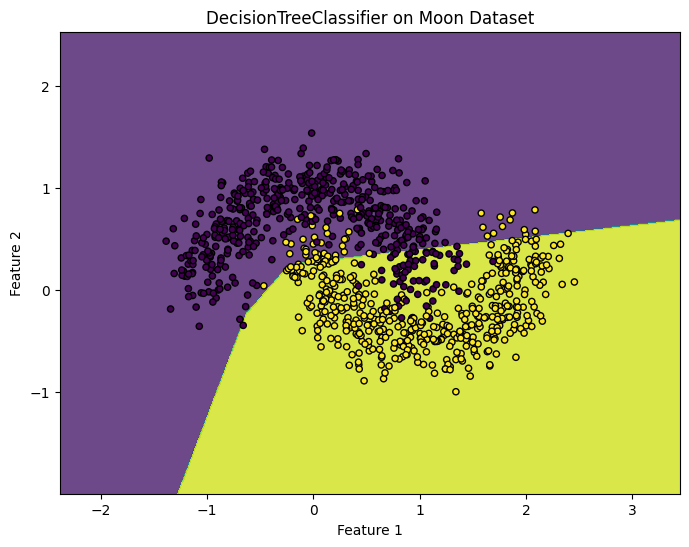

In [31]:
# Create a mesh to plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classifications for every point in the mesh
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
plt.title('DecisionTreeClassifier on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


# Jetzt seid Ihr an der Reihe !

###1. Übung

Versucht bitte ein Modell zu trainieren welches das Moon-dataset(mit folgenden Parametern : (n_samples=2000, noise=0.15, random_state=5)) mit mindestens 95% Accuracy auf einem Testset klassifizieren kann.

Ihr könnt zum Beispiel [SVM (Support Vector Machiene)](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) verwenden aber auch viele andere Klassifzierungs Modelle wie z.b.

*  [Nearest Neighbors Classification](https://scikit-learn.org/stable/modules/neighbors.html#classification)
*   [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)
* [etc.](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

Vorgehensweise:



1.  Modell Importieren
2.  Daten erzeugen
3.  Daten visualisieren
4.  Train/Test Split
5.  Modell trainieren ( Für SVM : zuerst einmal mit dem parameter kernel='linear', dann mit kernel='rbf' probieren.)

[clf = svm.SVC(kernel='linear')]
6.  Modell evaluieren [from sklearn.metrics import accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
7.  Entscheidungsgrenze visualisieren





### Lösungen

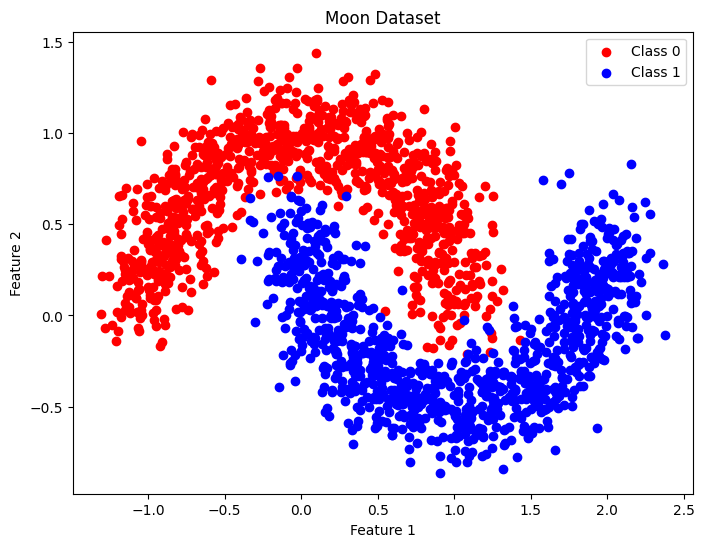

In [32]:
# Generate the dataset
X_own, y_own = make_moons(n_samples=2000, noise=0.15, random_state=5)
# Plotting the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_own[ y_own == 0][:, 0], X_own[ y_own == 0][:, 1], color='red', label='Class 0')
plt.scatter(X_own[ y_own == 1][:, 0], X_own[ y_own == 1][:, 1], color='blue', label='Class 1')
plt.title('Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [33]:
# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X_own, y_own, test_size=0.2, random_state=42)

In [34]:
from sklearn import svm
from sklearn.metrics import accuracy_score
clf = svm.SVC(kernel='linear')
#training des Modells
clf.fit(X_train, y_train)
accuracy_score(y_test, clf.predict(X_test))

0.91

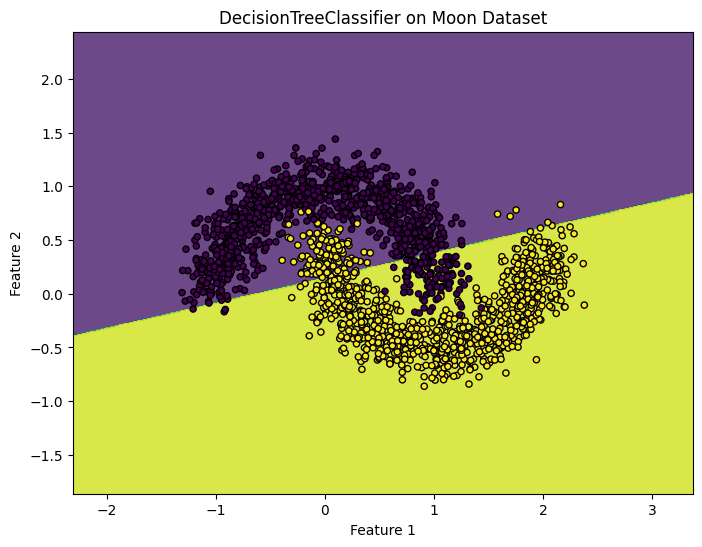

In [35]:
# Create a mesh to plot the decision boundary
x_min, x_max = X_own[:, 0].min() - 1, X_own[:, 0].max() + 1
y_min, y_max = X_own[:, 1].min() - 1, X_own[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classifications for every point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_own[:, 0], X_own[:, 1], c=y_own, s=20, edgecolor='k')
plt.title('DecisionTreeClassifier on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

0.995


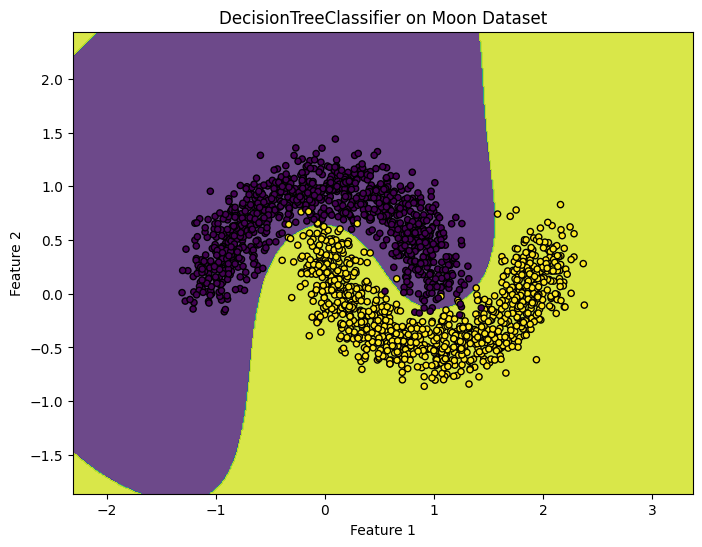

In [36]:

clf = svm.SVC(kernel='rbf')
#training des Modells
clf.fit(X_train, y_train)
print(accuracy_score(y_test, clf.predict(X_test)))
# Create a mesh to plot the decision boundary
x_min, x_max = X_own[:, 0].min() - 1, X_own[:, 0].max() + 1
y_min, y_max = X_own[:, 1].min() - 1, X_own[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classifications for every point in the mesh
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_own[:, 0], X_own[:, 1], c=y_own, s=20, edgecolor='k')
plt.title('DecisionTreeClassifier on Moon Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### 2. Übung

Das "Breast Cancer Wisconsin (Diagnostic) Dataset" ist ein bekanntes Set für maschinelles Lernen, das speziell zur Klassifizierung von Brustkrebs verwendet wird. Es beinhaltet Daten, die dazu beitragen, Brustkrebsfälle als bösartig (maligne) oder gutartig (benigne) zu klassifizieren. Hier ist eine detaillierte Beschreibung des Datensatzes und eine Anleitung, wie man ihn in Python lädt und untersucht:

## Beschreibung des Datensatzes:

- **Anzahl der Instanzen:** 569
- **Anzahl der Attribute:** 30 numerische, prädiktive Attribute und die Klasse

### Attribute Information:

- Radius (Mittelwert der Entfernungen vom Zentrum zu Punkten am Umfang)
- Textur (Standardabweichung der Graustufenwerte)
- Umfang
- Fläche
- Glätte (lokale Variation der Radiuslängen)
- Kompaktheit (Umfang^2 / Fläche - 1.0)
- Konkavität (Schwere der konkaven Teile des Umrisses)
- Konkave Punkte (Anzahl konkaver Teile des Umrisses)
- Symmetrie
- Fraktale Dimension ("Küstenliniennäherung" - 1)

Die Merkmale werden aus einem digitalisierten Bild einer Feinnadelaspiration (FNA) einer Brustmasse berechnet. Sie beschreiben die Charakteristika der Zellkerne, die im Bild vorhanden sind.


### Zusätzliche Berechnungen:

Für jede Eigenschaft wurden der Mittelwert, der Standardfehler und der "schlechteste" oder größte Wert (Mittelwert der drei schlechtesten/größten Werte) berechnet, was in 30 Merkmalen resultiert.

### Klassen:

- WDBC-Malignant (Bösartig)
- WDBC-Benign (Gutartig)




## Laden des Datensatzes in Python:

Um den Datensatz in Python zu laden, kann man die `scikit-learn` Bibliothek verwenden, die diesen Datensatz als Teil ihres `datasets` Moduls enthält. Hier ist ein Beispielcode, um den Datensatz zu laden und eine grundlegende Untersuchung durchzuführen:

```python
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Laden des Datensatzes
data = load_breast_cancer()

# Erstellen eines DataFrames
df = pd.DataFrame(data.data, columns=data.feature_names)

# Hinzufügen der Zielvariable
df['target'] = data.target

# Anzeigen der ersten fünf Zeilen des DataFrame
print(df.head())

# Grundlegende Statistik des Datensatzes
print(df.describe())


Aufgabe: Versuche einen Klassifizierungsmodell zu entwicklen welches möglichst genau Bösartig oder Gutartig vorhersagen kann.

### Lösungen

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Laden des Datensatzes
data = load_breast_cancer()

# Erstellen eines DataFrames
df = pd.DataFrame(data.data, columns=data.feature_names)

# Hinzufügen der Zielvariable
df['target'] = data.target

# Anzeigen der ersten fünf Zeilen des DataFrame
print(df.head())

# Grundlegende Statistik des Datensatzes
print(df.describe())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [38]:
# Features und Zielvariable
# Alles was nicht target ist
X = df.drop('target', axis=1)
# Nur target
y = df['target']


In [39]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


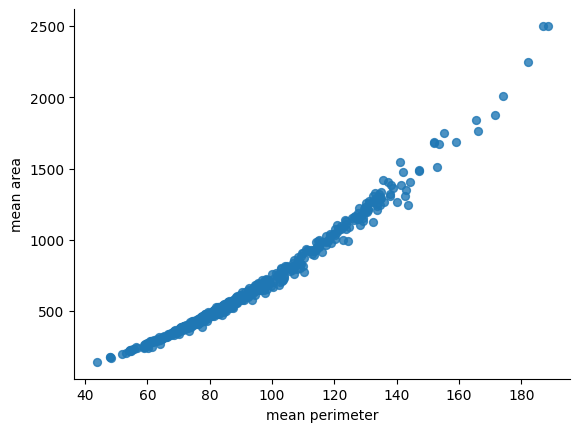

In [40]:
from matplotlib import pyplot as plt
X.plot(kind='scatter', x='mean perimeter', y='mean area', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: >

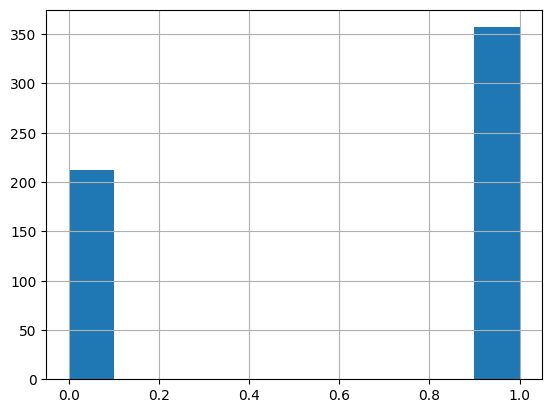

In [41]:
y.hist()

In [42]:
from sklearn.metrics import classification_report
# Daten in Trainings- und Testsets aufteilen
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Das temporäre Set in Validierungs- und Testsets aufteilen
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Definieren des Modells
model = Sequential([
    Dense(10, input_shape=(30,), activation='relu'),
    Dense(10, activation='relu'),
     Dense(10, activation='relu'),
     Dense(10, activation='relu'),
     Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Kompilieren des Modells
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Trainieren des Modells mit Validierungsdaten
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_val, y_val), verbose=0)

# Evaluieren des Modells auf dem Testset
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print('\nTest accuracy:', test_acc)



3/3 [==============================] - 0s 6ms/step - loss: 0.0978 - accuracy: 0.9535

Test accuracy: 0.9534883499145508


In [43]:
predictions = model.predict(X_test)
print(predictions[:5])
predicted_classes = (predictions > 0.5).astype(int)
print(predicted_classes[:5])


3/3 [==============================] - 0s 4ms/step
[[0.9999789 ]
 [0.73163944]
 [0.9989585 ]
 [0.0037861 ]
 [0.95808804]]
[[1]
 [1]
 [1]
 [0]
 [1]]
